# Ejercicio 1

Datamining en economía y finanza 2023

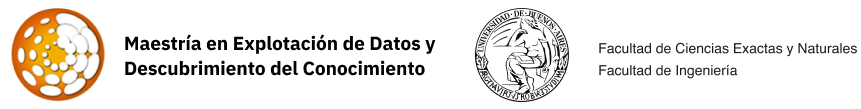

Re-escritura del código en lenguaje R en un cuaderno ipynb para su ejecución en Jupyter-notebok o JuyterLab, local o remoto (e.g. Google Colaboratory)  
por [Víctor A. Bettachini](mailto:bettachini@gmail.com)

2023-08-19

## Carga del dataset

In [10]:
if(!require('data.table') ){
    install.packages('data.table')
}
library('data.table')

In [11]:
dataset <- fread("./competencia_01.csv")

## Separación train/test

In [12]:
# ?
dtrain <- dataset[foto_mes == 202103] # defino donde voy a entrenar
dapply <- dataset[foto_mes == 202105] # defino donde voy a aplicar el modelo

## Generación del modelo

Aqui se construye el arbol.  
Quiero predecir clase_ternaria a partir de el resto de las variables

In [13]:
if(!require('rpart') ){
    install.packages('rpart')
}
library('rpart')
library('rpart.plot')

In [14]:

modelo <- rpart(
        formula = "clase_ternaria ~ .",
        data = dtrain, # los datos donde voy a entrenar
        xval = 0,
        cp = -0.3, # esto significa no limitar la complejidad de los splits
        minsplit = 0, # minima cantidad de registros para que se haga el split
        minbucket = 1, # tamaño minimo de una hoja
        maxdepth = 3
) # profundidad maxima del arbol

## Graficación del arbol

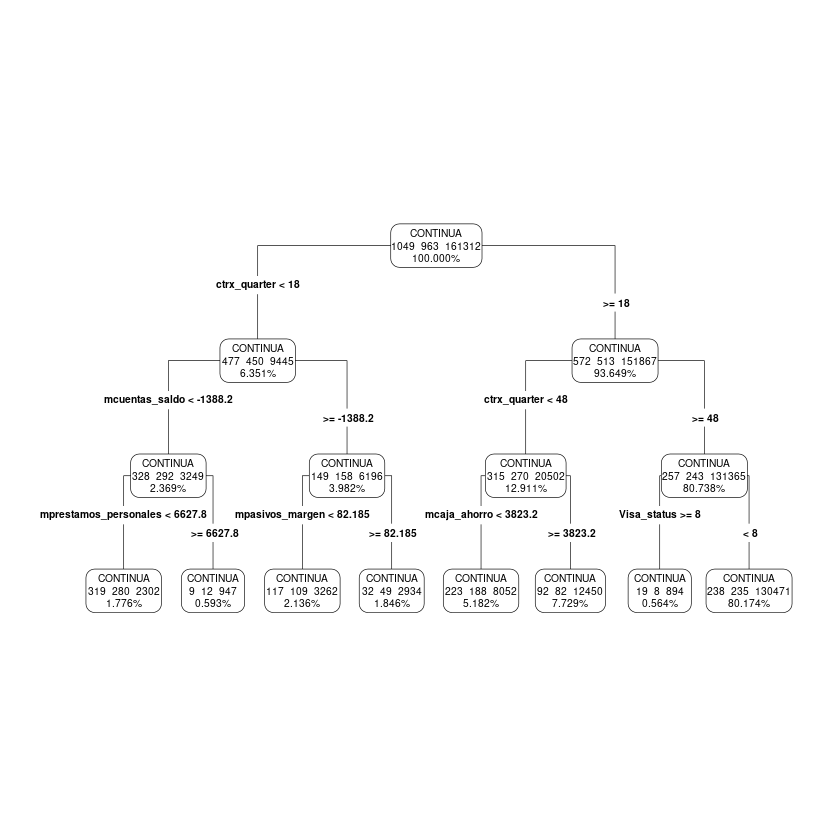

In [17]:
prp(modelo,
        extra = 101, digits = -5,
        branch = 1, type = 4, varlen = 0, faclen = 0
)

## Aplico el modelo a los datos nuevos

In [20]:
prediccion <- predict(
        object = modelo,
        newdata = dapply,
        type = "prob"
)

Prediccion es una matriz con TRES columnas,  
llamadas "BAJA+1", "BAJA+2"  y "CONTINUA"  
cada columna es el vector de probabilidades

## Agrego a dapply una columna nueva que es la probabilidad de BAJA+2

In [21]:
dapply[, prob_baja2 := prediccion[, "BAJA+2"]]

solo le envio estimulo a los registros  
con probabilidad de BAJA+2 mayor a 1/40

In [22]:
dapply[, Predicted := as.numeric(prob_baja2 > 1 / 40)]

## Genero el archivo para Kaggle

Primero creo la carpeta donde va el experimento

In [23]:
dir.create("./exp/")
dir.create("./exp/KA2001")

solo los campos para Kaggle

In [24]:
fwrite(dapply[, list(numero_de_cliente, Predicted)],
        file = "./exp/KA2001/K101_001.csv",
        sep = ","
)